# Importing the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Data collection and Cleaning

In [2]:
#loading the dataset
customer= pd.read_excel("Mall_Customers.xlsx")
customer

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
customer

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
#first five rows of the dataset
customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
customer.shape

(200, 5)

In [6]:
#information regarding dataset
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
#checking for null values
customer.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
#checking for duplicate values
customer[customer.duplicated()]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


In [9]:
customer.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
customer.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [11]:
#dropping "CustomerID" column
customer.drop(["CustomerID"],axis=1, inplace=True)
customer

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


# Data Analysis and Visualization

# Plotting count for Annual Income

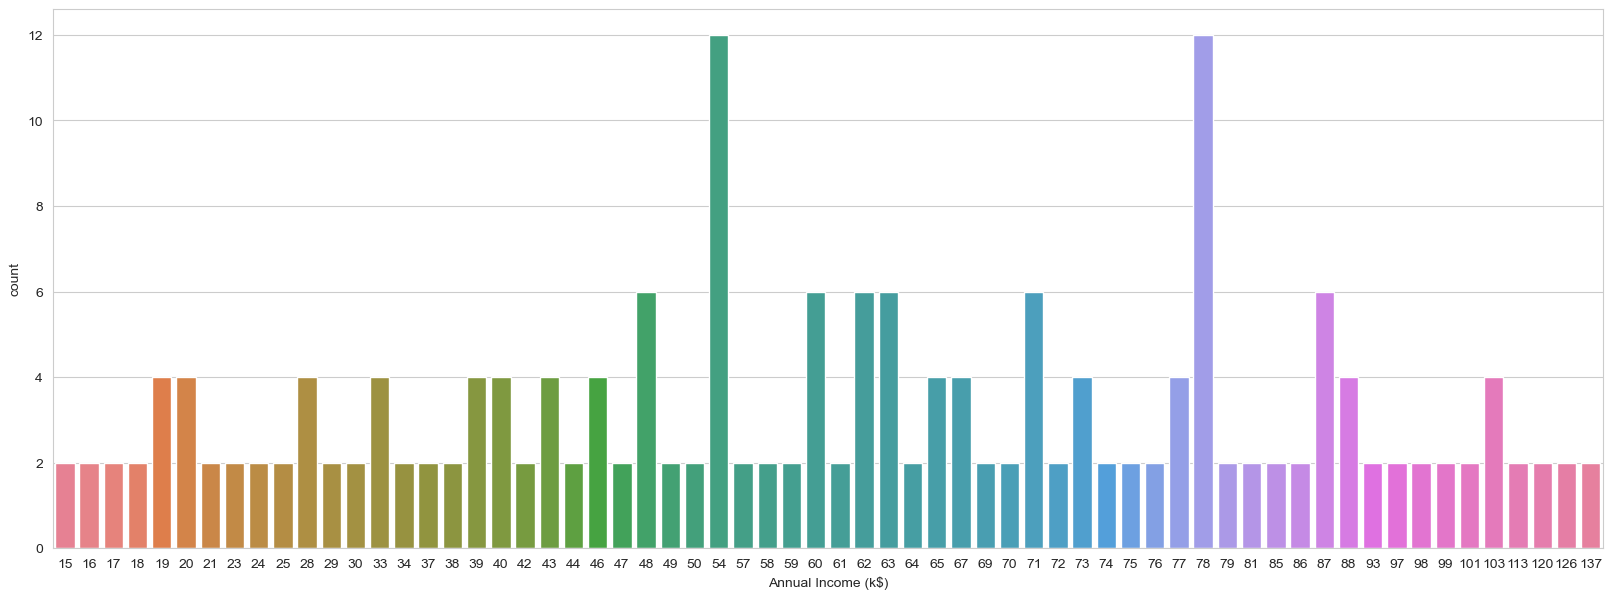

In [12]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 7))
sns.countplot(x="Annual Income (k$)", data=customer, palette='husl');

# Plot distribution for each column in dataset

C:\Users\DELL\AppData\Local\Temp\ipykernel_1252\178567290.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer[x], bins= 20)
C:\Users\DELL\AppData\Local\Temp\ipykernel_1252\178567290.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer[x], bins= 20)
C:\Users\DELL\AppData\Local\Te

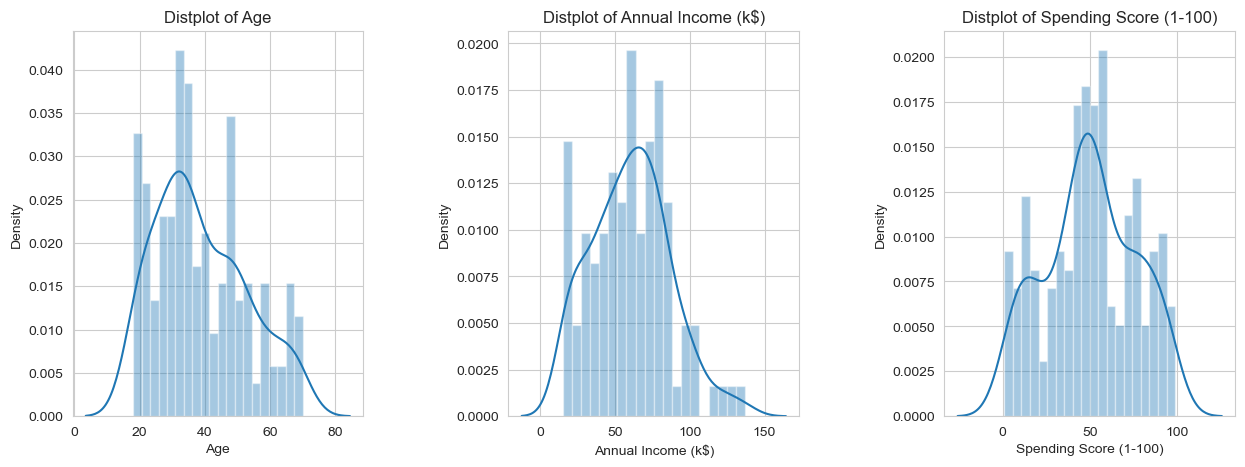

In [13]:
plt.figure(1, figsize=(15,5))
n=0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace= 0.5)
    sns.distplot(customer[x], bins= 20)
    plt.title("Distplot of {}".format(x))
plt.show()

# Distribution of male and females in the dataset

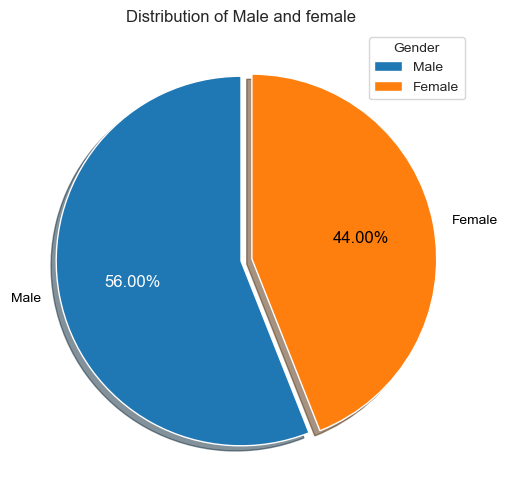

In [14]:
values = customer['Gender'].value_counts()
labels = ['Male', 'Female']
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
explode = (0, 0.06)
plt.title("Distribution of Male and female")
patches, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.2f%%', shadow=True,startangle=90, explode=explode)
plt.setp(texts, color='black')
plt.setp(autotexts, size=12, color='white')
autotexts[1].set_color('black')
plt.legend(title="Gender")
plt.show()

# Age Distribution

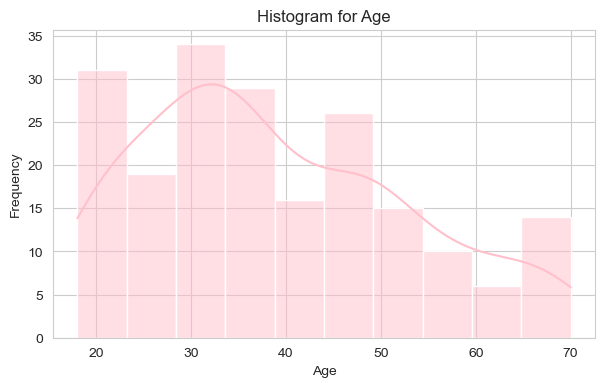

In [15]:
plt.figure(figsize=(7,4))
sns.histplot(customer['Age'], bins=10, kde=True, color='pink')
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of Annual income

C:\Users\DELL\AppData\Local\Temp\ipykernel_1252\3115771122.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(customer['Annual Income (k$)'], shade=True, color='skyblue')


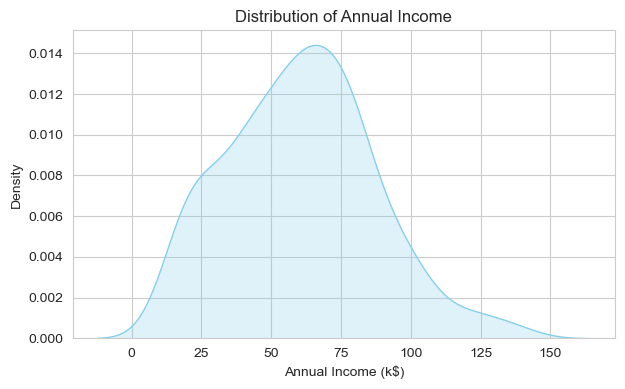

In [16]:
plt.figure(figsize=(7,4))
sns.kdeplot(customer['Annual Income (k$)'], shade=True, color='skyblue')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Density')
plt.show()

# Box plot for Spending Score across Genre

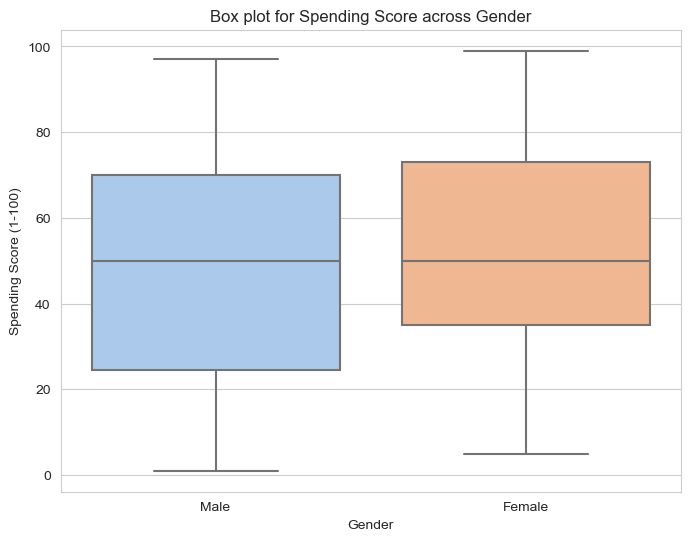

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=customer, palette='pastel')
plt.title('Box plot for Spending Score across Gender')
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Gender')
plt.show()

# Box Plot for Annual Income across Gender

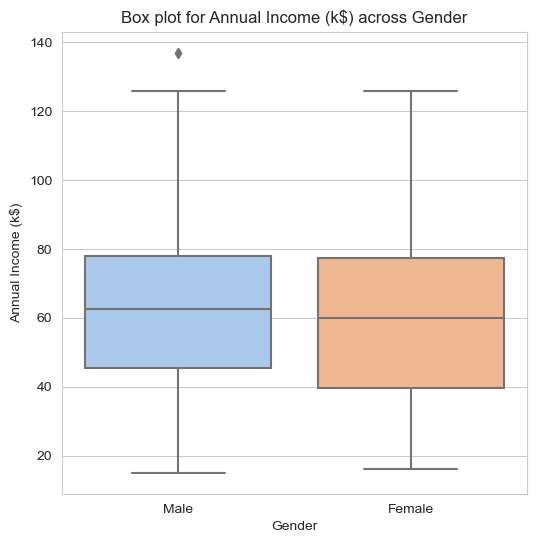

In [18]:
plt.figure(figsize=(6,6))
sns.boxplot(x='Gender', y='Annual Income (k$)', data=customer, palette='pastel')
plt.title('Box plot for Annual Income (k$) across Gender')
plt.ylabel('Annual Income (k$)')
plt.xlabel('Gender')
plt.show()

# Comparision of Spending Score of Male and Female

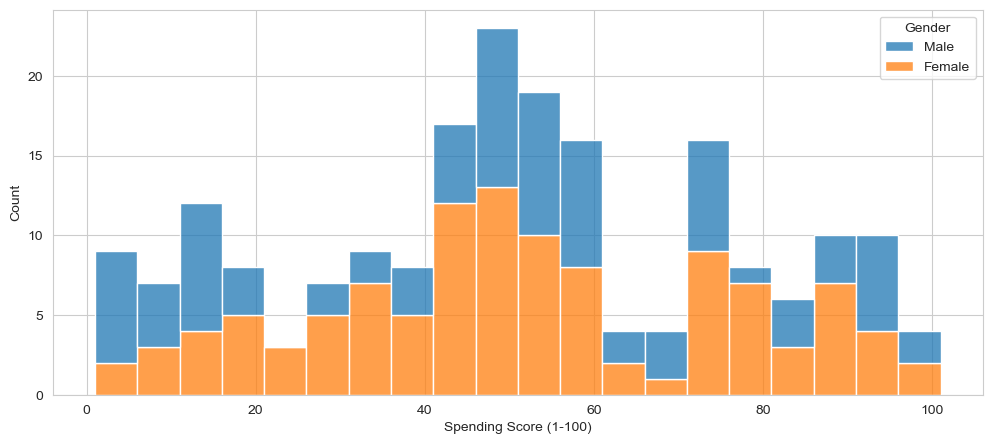

In [19]:
plt.figure(figsize=(12, 5))
sns.histplot(data=customer, x='Spending Score (1-100)', hue='Gender', binwidth=5, multiple='stack');

# Distribution of Males in the dataset

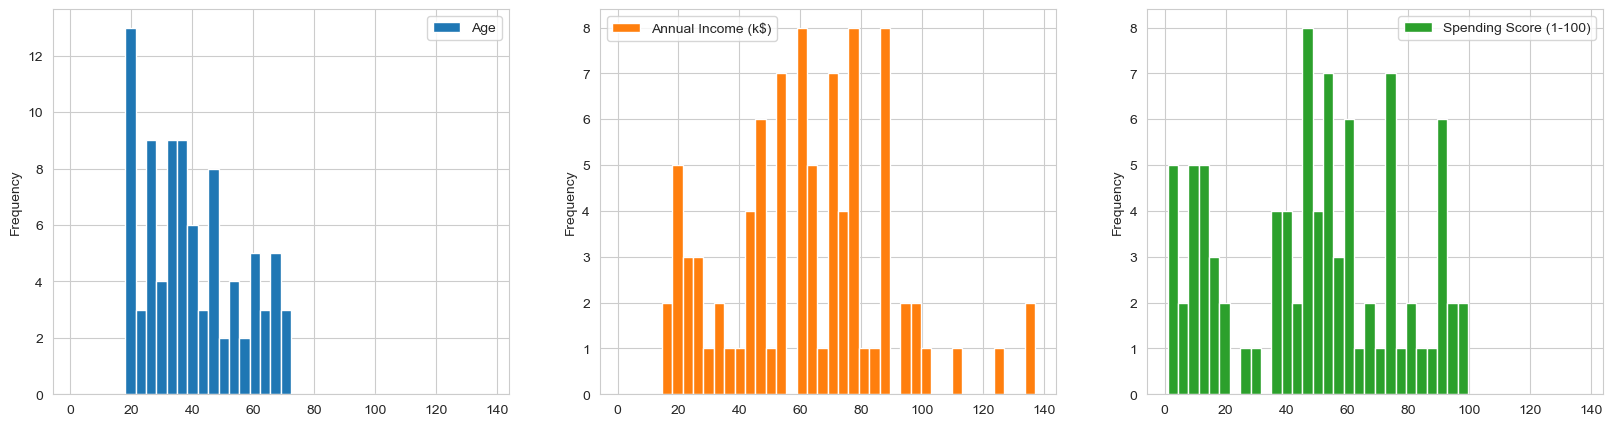

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
data = customer.groupby(by='Gender')
data.get_group("Male").plot(kind='hist', ax=ax, subplots=True, bins=40);

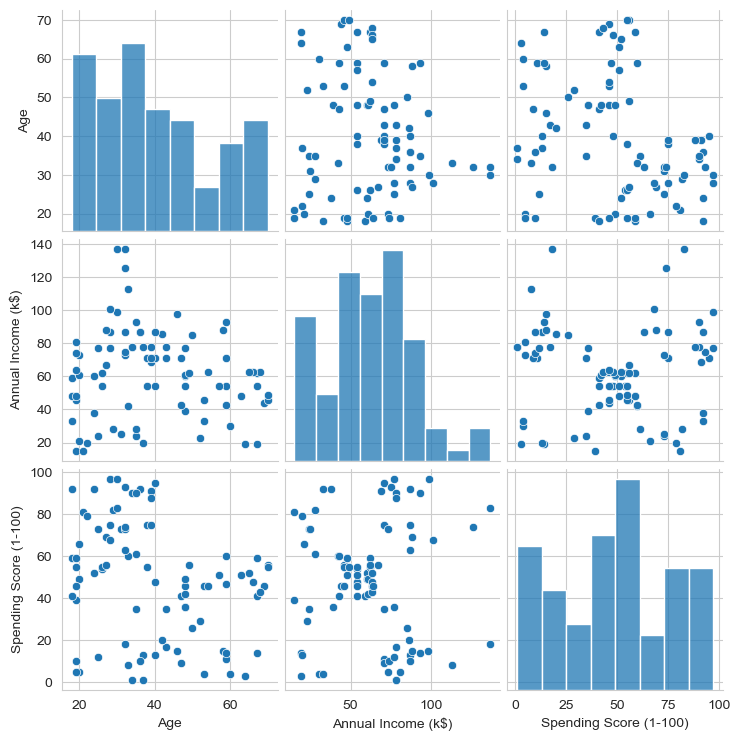

In [21]:
sns.pairplot(data.get_group("Male"));

# Distribution of Females in the dataset

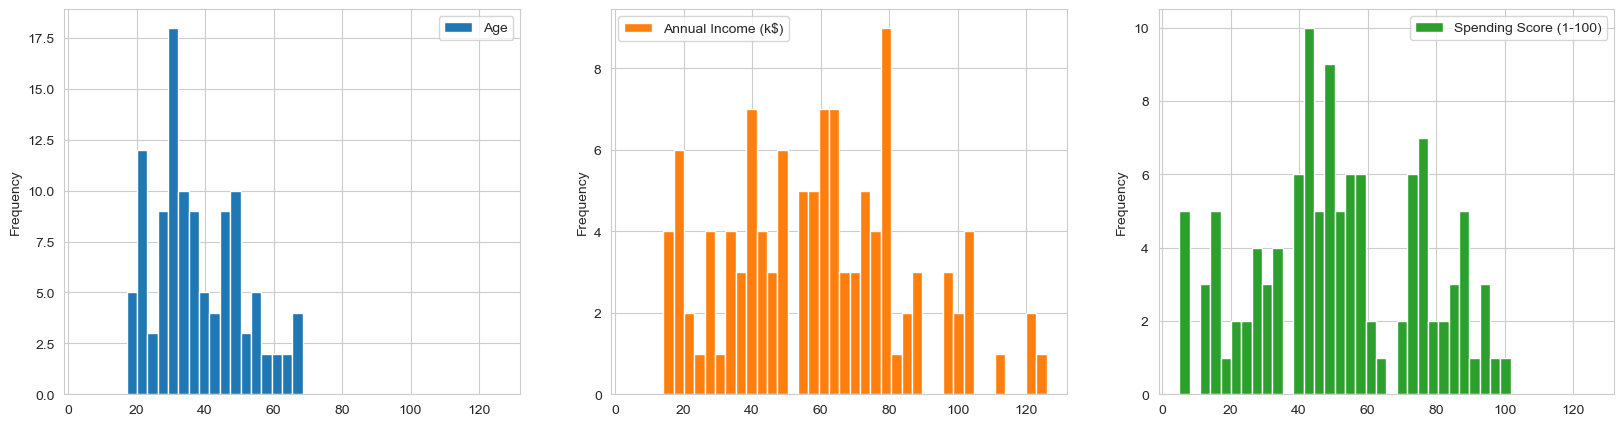

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
data = customer.groupby(by='Gender')
data.get_group("Female").plot(kind='hist', ax=ax, subplots=True, bins=40);

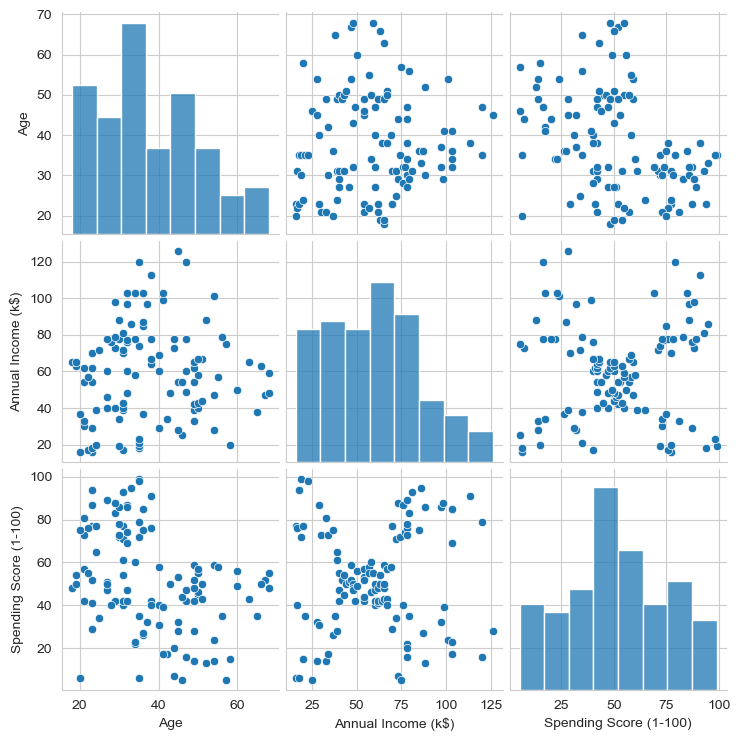

In [23]:
sns.pairplot(data.get_group("Female"));

# Voilin Distribution for Age, Annual Income & spending Score based on Gender

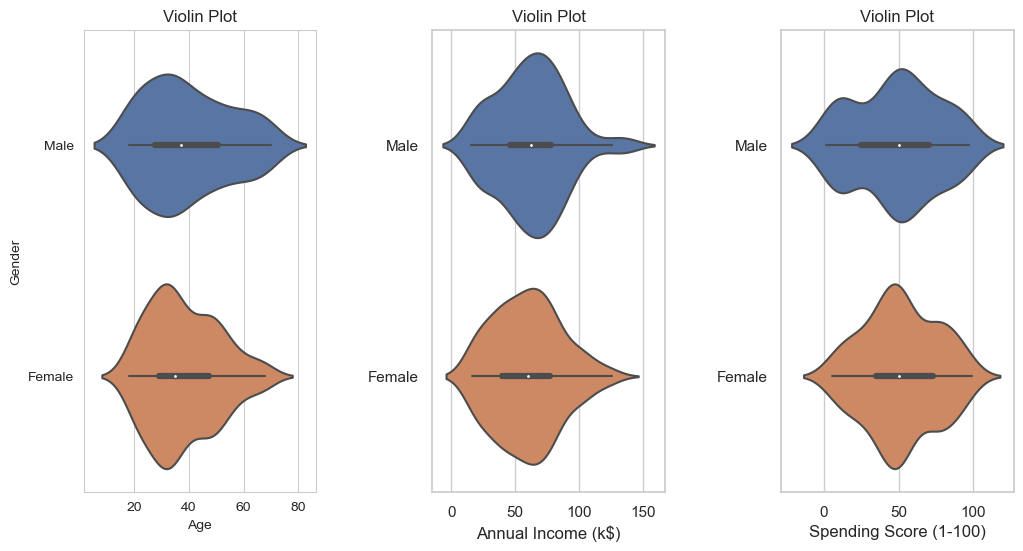

In [24]:
plt.figure(1, figsize=(12,6))
n=0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    sns.set(style = "whitegrid")
    plt.subplots_adjust(hspace=0.5, wspace= 0.5)
    sns.violinplot(x = cols, y = 'Gender', data = customer)
    plt.ylabel('Gender' if n == 1 else " ")
    plt.title("Violin Plot")
plt.show()

# Analysing Spending Score on the basis of Age 

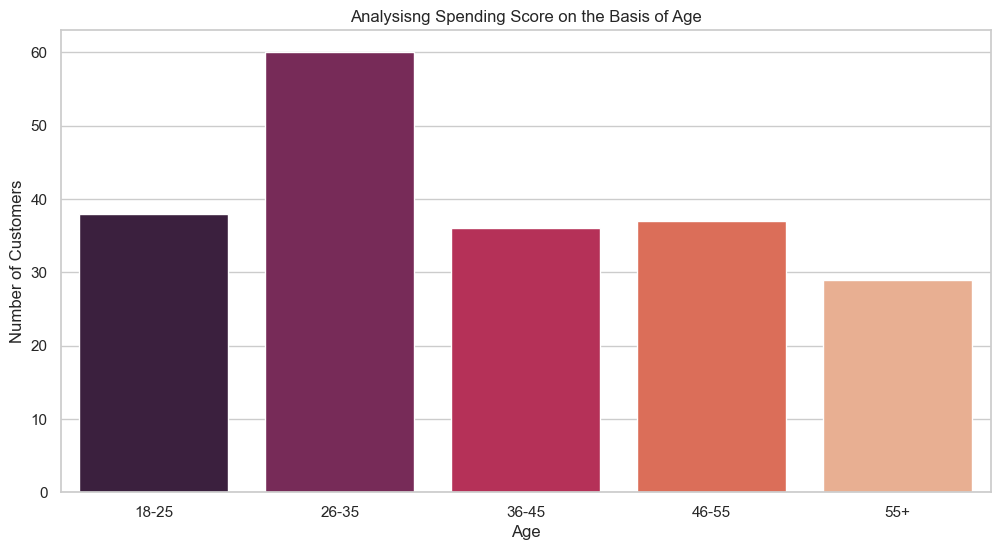

In [25]:
age_18_25 = customer.Age[(customer.Age >= 18) & (customer.Age <= 25)]
age_26_35 = customer.Age[(customer.Age >= 26) & (customer.Age <= 35)]
age_36_45 = customer.Age[(customer.Age >= 36) & (customer.Age <= 45)]
age_46_55 = customer.Age[(customer.Age >= 46) & (customer.Age <= 55)]
age_55above = customer.Age[customer.Age >= 56]

agex = ["18-25", "26-35", "36-45", "46-55", "55+"]
agey = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values), len(age_55above.values)]

plt.figure(figsize=(12,6))
sns.barplot(x= agex, y= agey, palette = "rocket")
plt.title("Analysisng Spending Score on the Basis of Age")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

# Relationship between Annual Income and Spending Score

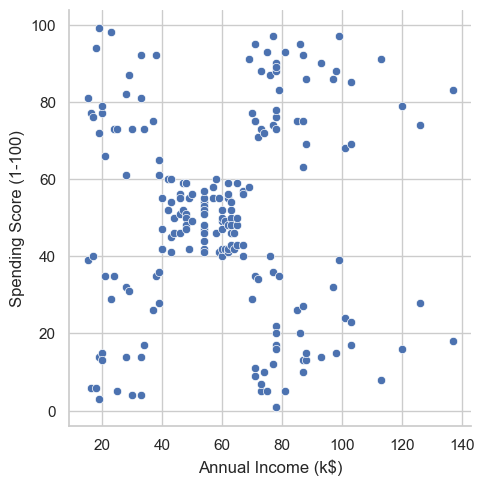

In [26]:
sns.relplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=customer)

# Scatter Plot for Annual income & Spending score

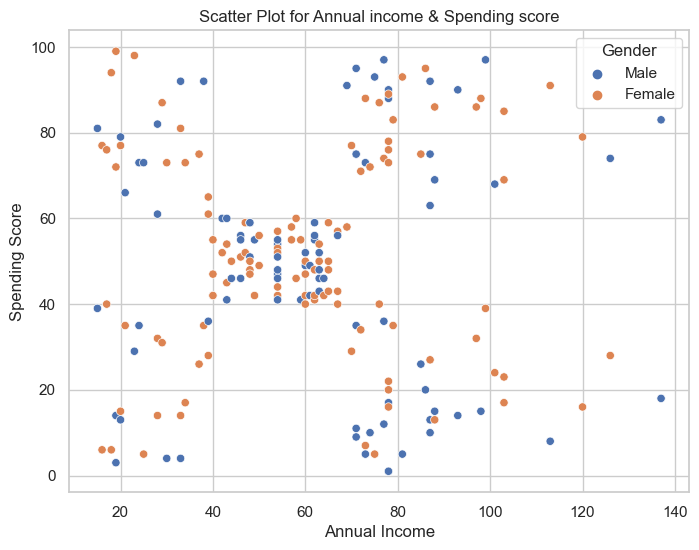

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender", data=customer)
plt.title("Scatter Plot for Annual income & Spending score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

# Analysing Spending score on the basisi of Customer Scores

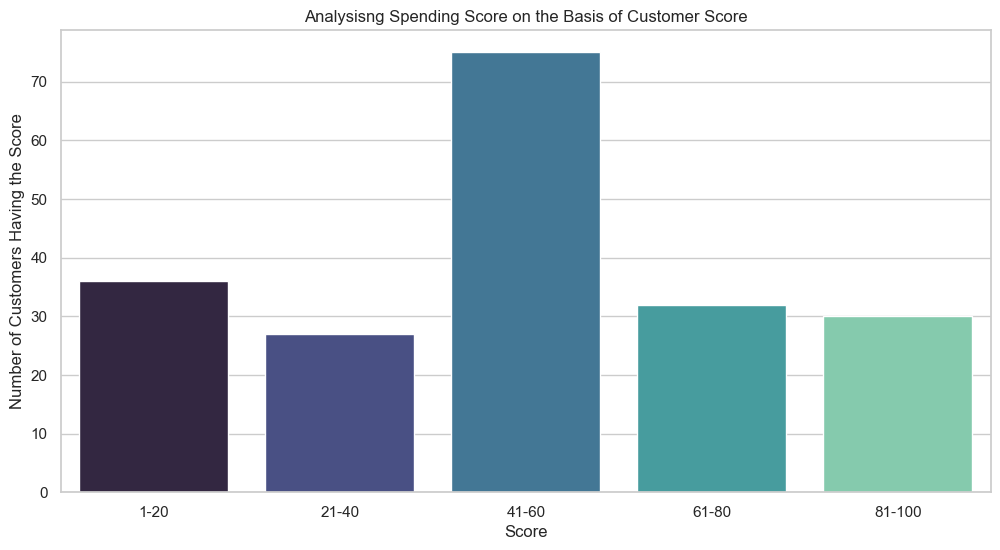

In [28]:
ss_1_20 = customer["Spending Score (1-100)"][(customer["Spending Score (1-100)"] >= 1) & (customer["Spending Score (1-100)"] <= 20)]
ss_21_40 = customer["Spending Score (1-100)"][(customer["Spending Score (1-100)"] >= 21) & (customer["Spending Score (1-100)"] <= 40)]
ss_41_60 = customer["Spending Score (1-100)"][(customer["Spending Score (1-100)"] >= 41) & (customer["Spending Score (1-100)"] <= 60)]
ss_61_80 = customer["Spending Score (1-100)"][(customer["Spending Score (1-100)"] >= 61) & (customer["Spending Score (1-100)"] <= 80)]
ss_81_100 = customer["Spending Score (1-100)"][(customer["Spending Score (1-100)"] >= 81) & (customer["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100.values)]

plt.figure(figsize=(12,6))
sns.barplot(x= ssx, y= ssy, palette = "mako")
plt.title("Analysisng Spending Score on the Basis of Customer Score")
plt.xlabel("Score")
plt.ylabel("Number of Customers Having the Score")
plt.show()

# Analysing Annual income on the Basis of Customer's Income

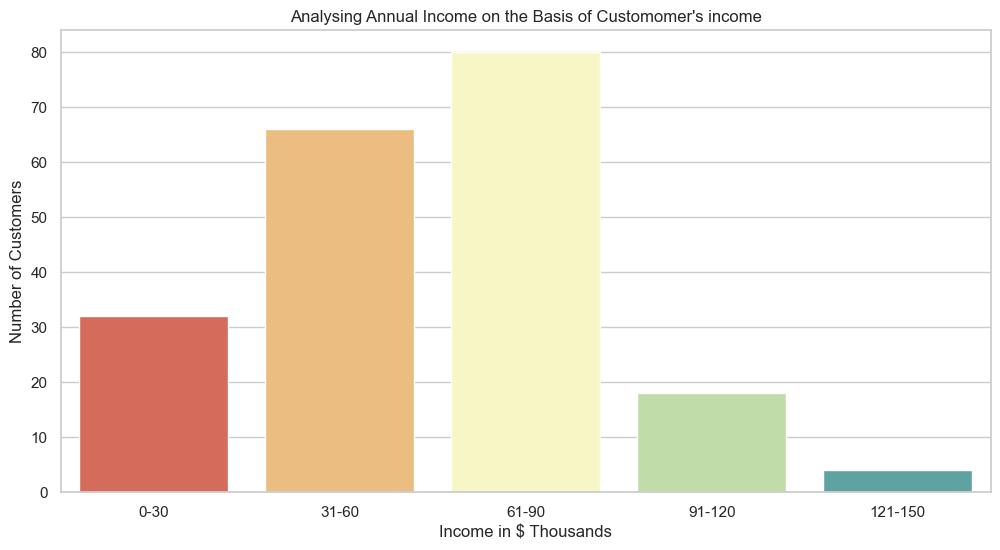

In [29]:
ai_0_30 = customer['Annual Income (k$)'][(customer['Annual Income (k$)'] >= 0) & (customer['Annual Income (k$)'] <= 30)]
ai_31_60 = customer['Annual Income (k$)'][(customer['Annual Income (k$)'] >= 31) & (customer['Annual Income (k$)'] <= 60)]
ai_61_90 = customer['Annual Income (k$)'][(customer['Annual Income (k$)'] >= 61) & (customer['Annual Income (k$)'] <= 90)]
ai_91_120 = customer['Annual Income (k$)'][(customer['Annual Income (k$)'] >= 91) & (customer['Annual Income (k$)'] <= 120)]
ai_121_150 = customer['Annual Income (k$)'][(customer['Annual Income (k$)'] >= 121) & (customer['Annual Income (k$)'] <= 150)]

aix = ["0-30", "31-60", "61-90", "91-120", "121-150"]
aiy = [len(ai_0_30.values), len(ai_31_60.values), len(ai_61_90.values), len(ai_91_120.values), len(ai_121_150.values)]

plt.figure(figsize=(12,6))
sns.barplot(x= aix, y= aiy, palette = "Spectral")
plt.title("Analysing Annual Income on the Basis of Customomer\'s income")
plt.xlabel("Income in $ Thousands")
plt.ylabel("Number of Customers")
plt.show()

# Model Building

# K-Means Clustering

In [30]:
#choosing the annual income and spending score column
X = customer.iloc[:,[2,3]].values
X

In [31]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Finding the number of clusters

In [32]:
#WCSS(Within clusters sum of squares)- It is defined as the sum of square distances between the centroids and each points.


In [33]:
#finding the wcss value for different number of clusters

In [34]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

In [35]:
#Plot the Elbow graph

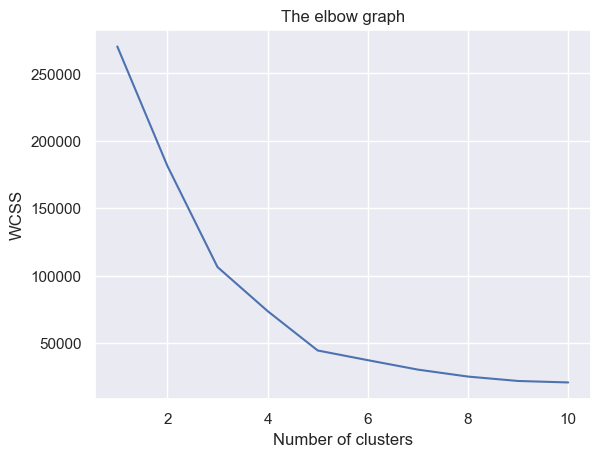

In [36]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title("The elbow graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

# Optimum Number of Clusters will be 5

# Training the K-means Clustering Model

In [37]:
kmeans = KMeans(n_clusters = 5, random_state = 0)

#returns the label for each data point based on their clusters
Y= kmeans.fit_predict(X)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [38]:
Y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [39]:
customer['KMeans_Cluster'] = Y

# Visualizing all the Clusters

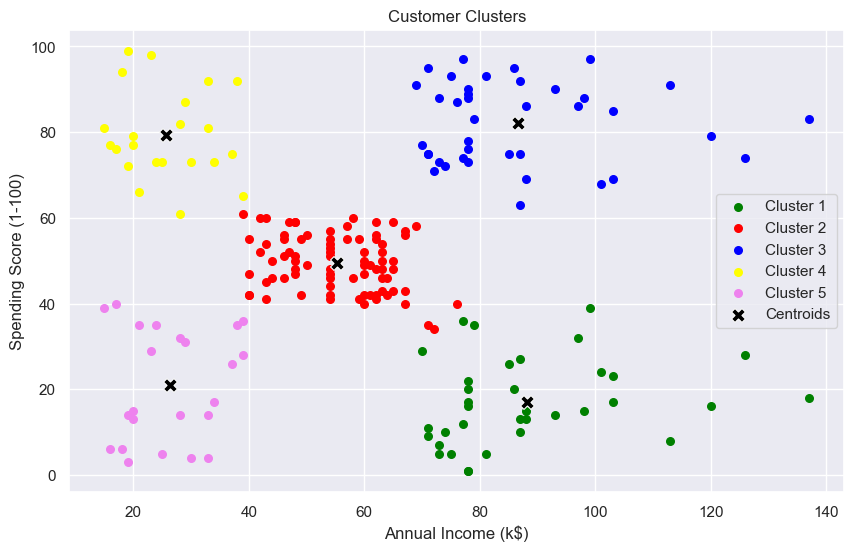

In [40]:
#plotting all the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X[Y==0,0], X[Y==0,1], s=30, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=30, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=30, c='blue', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=30, c='yellow', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=30, c='violet', label='Cluster 5')

#plotting the centroids
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color='black', s=100, marker='X', label='Centroids')
plt.title('Customer Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [41]:
kmeans.predict([[15,39]])

array([4])

# Hierarchical Clustering (Agglomerative Clustering)

In [42]:
from sklearn.cluster import AgglomerativeClustering

In [43]:
agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_labels = agg_clustering.fit_predict(X)

In [44]:
customer['Agg_Cluster'] = agg_labels

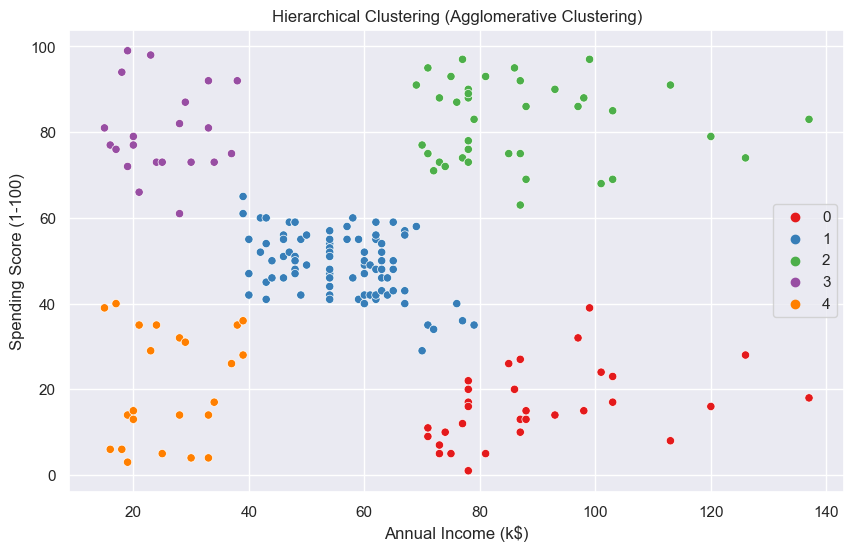

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Agg_Cluster', data=customer, palette='Set1')
plt.title('Hierarchical Clustering (Agglomerative Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [47]:
Z = linkage(X, method='ward')

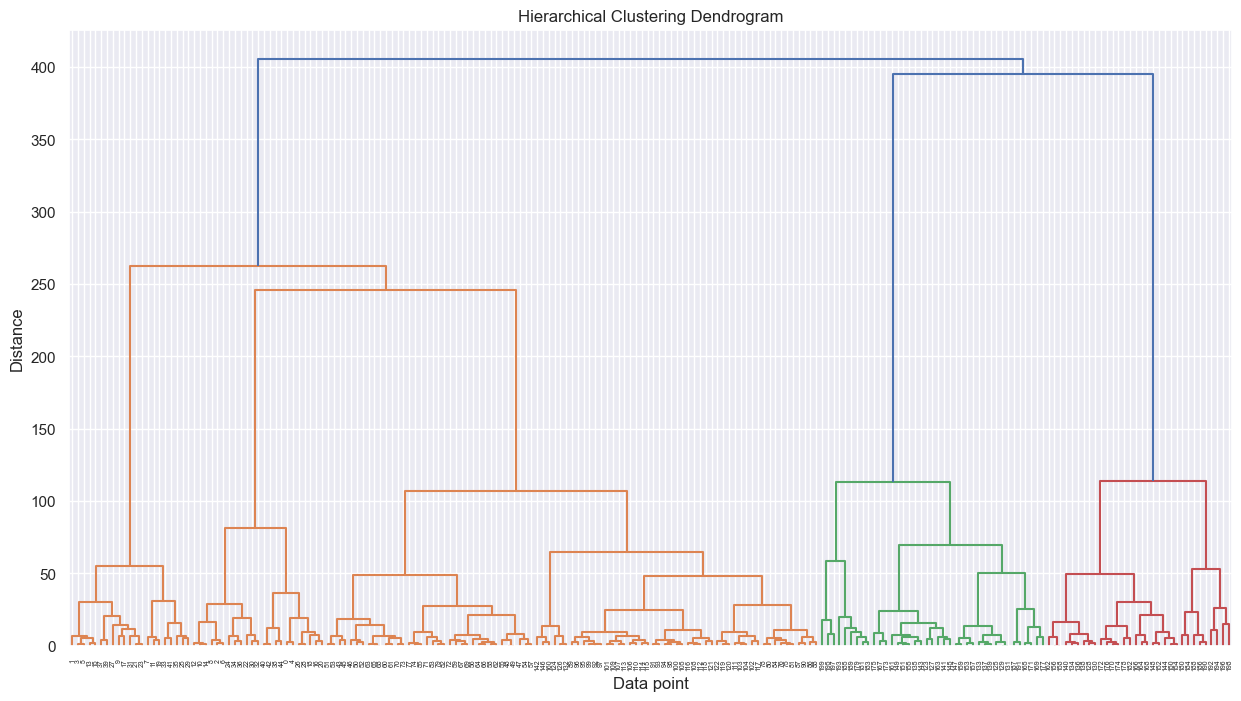

In [48]:
plt.figure(figsize=(15, 8))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
plt.show()

# Saving the Model with Joblib

In [49]:
import joblib

In [50]:
joblib.dump(kmeans, "Mall Customer Segmentation")

['Mall Customer Segmentation']

In [51]:
model = joblib.load("Mall Customer Segmentation")

In [52]:
model

KMeans(n_clusters=5, random_state=0)

In [53]:
model.predict([[15,39]])

array([4])

# Graphical User Interface

In [54]:
from tkinter import*
import joblib

In [59]:
#Gui 1
def show_entry_fields():
    a1=int(b1.get())
    a2=int(b2.get())
    
    model = joblib.load("Mall Customer Segmentation")
    result=model.predict([[a1,a2]])
    print("This Customer belongs to Cluster: ", result[0])
    
    if result[0] == 0:
        Label(master, text = "Customers with medium annual income and medium spending score")
    elif result[0] == 1:
        Label(master, text = "Customers with high annual income but low spending score")
    elif result[0] == 2:
        Label(master, text = "Customers with low annual income but low spending score")
    elif result[0] == 3:
        Label(master, text = "Customers with low annual income but high spending score")
    elif result[0] == 4:
        Label(master, text = "Customers with high annual income and high spending score")
        
master = Tk()
master.title("Customer Segmentation")

label=Label(master,text="Customer Segmentation"
            , bg="Black", fg="White").grid(row=0,columnspan=2)

label=Label(master,text="Annual income").grid(row=1)
label=Label(master,text="Spending Score").grid(row=2)

b1 = Entry(master)
b2 = Entry(master)

b1.grid(row=1, column=1)
b2.grid(row=2, column=1)

Button(master, text= "Predict", command = show_entry_fields).grid()

mainloop()

In [61]:
#GUI 2
from tkinter import Tk, Label, Entry, Button, mainloop
import joblib

def show_entry_fields():
    a1 = int(b1.get())
    a2 = int(b2.get())

    model = joblib.load("Mall Customer Segmentation")
    result = model.predict([[a1, a2]])
    print("This Customer belongs to Cluster:", result[0])

    # Update a Text widget with the prediction result
    result_text.delete(1.0, "end")
    result_text.insert("end", get_cluster_description(result[0]))

def get_cluster_description(cluster):
    descriptions = [
        "Customers with medium annual income and medium spending score",
        "Customers with high annual income but low spending score",
        "Customers with low annual income but low spending score",
        "Customers with low annual income but high spending score",
        "Customers with high annual income and high spending score"
    ]
    return descriptions[cluster]

master = Tk()
master.title("Customer Segmentation")

Label(master, text="Customer Segmentation", bg="black", fg="white").grid(row=0, columnspan=2)
Label(master, text="Annual income").grid(row=1)
Label(master, text="Spending Score").grid(row=2)

b1 = Entry(master)
b2 = Entry(master)

b1.grid(row=1, column=1)
b2.grid(row=2, column=1)

Button(master, text="Predict", command=show_entry_fields).grid(row=3, columnspan=2)

# Add a Text widget to display the prediction result
result_text = Text(master, height=4, width=50)
result_text.grid(row=4, columnspan=2)

mainloop()
